# Data Science 1 | Final Project

## Predicting Methane Emissions in Ruminant Livestock

### By: David Lopez

#### Word Count: 2291

## Introduction

Methane emissions produced by ruminant livestock, such as cattle and sheep, are difficult to measure for a general population. In order to get the most accurate readings for methane production from a single cow, the cow must be attached to a respirator system that measures gas emissions from the cow over a period of time. The goal of my project is to use findings from these reported individual emissions to predict methane emissions for a generalized population of cows based on individual characteristics of the cows, such as differences in diet and size. The project report begins by explaining the problem at hand and why this area of study should be of importance. This includes looking at prior research aimed at addressing the problem. Then, I discuss how I produced my prediction model and corresponding findings. Finally, I conclude with thoughts about the success of the project and potential opportunities for expansion of analysis.

## Problem Statement and Background

Climate change is the biggest threat we are collectively facing on an international level, and agriculture is one of the largest producers of greenhouse gases. The main source of harmful emissions comes from methane gas released by ruminant livestock, such as sheep and cattle, through their digestive processes. Although much less methane is produced by livestock than carbon dioxide, methane poses a much larger threat to increased global warming, as methane gas carries about 28 times the warming potential of carbon dioxide. As efforts to decrease methane emissions from livestock through various experimentation emerge, it is important to be able to track the levels of methane being produced by a larger population over different geographic levels.

A 2019 study analyzing similar problems have used machine learning algorithms, such as a Random Forest (RF) classifier, to look at predictive features like dry matter intake, milk yield, and body weight to predict methane emissions in cattle (Negussie et al, 2019). This study was deemed successful by the authors due to the robustness of their model with the RF model having a predictive accuracy of 0.82. They used this information to monitor emissions of national and regional cattle inventories and assist farm management to inform herd improvement decisions.

## Data

The data I used for this analysis comes from multiple datasets of cows that have not been treated with any strategy to reduce their methane production (Roque, 2020). I organized these datasets by taking the multiple datasets and merging them together based on the assigned identification number of each cow. Each observation includes characteristics of an individual cow including details about their diet, size, and gasses produced, measured through a respiration system. Because we are focusing on the methane produced by these cows to be generalized on greater populations, the main outcome variable of interest is the amount of methane produced for an individual cow measured in grams of methane produced per day. The main predictors used in building my models have to do with the main differences in the cows that affect their methane production. These variables include the amount of dry matter the cows are being fed, the level of forage included in their diets, the cow’s weight, and the average amount of weight gained per day by the cows throughout the duration of their observation. I chose these explanatory variables as my predictors, because these have been shown to be the best determinants in their production of greenhouse gases. Also, these factors affect the receptiveness of cows to various treatment aimed at reducing their greenhouse gas emissions. Some issues I had with the data mainly include the lack of variables pertaining to the cows that would help generalize the predictive results of the final model, such as breed of the cow and whether the cow was lactating which affects their digestive process and level of methane produced. The cows studied in these datasets are also in the same geographic area, so differences in methane production due to climate are unable to be observed.

## Analysis

First, I used the Pandas package (McKinney et al, 2010) to analyze the datasets into a larger data frame. This included subsetting the data so that I would only be using the information on cows that were untreated in the predictive model. I did this by breaking the multiple treatments down into categorical variables and pulling out observations that fell into the control category. The NumPy (Harris et al, 2020) package allowed me to change the unit of analysis to interpret regression results more easily in the analysis of the effect of past experiments on methane production.  Graphing my results and other findings was done through plotnine (Wickman, 2016) and Matplotlib (Hunter, 2007) to compose plots of the interaction between variables and other visualizations. In building a statistical ordinary least squares model I utilized the statsmodel package (Seabold & Perktold, 2010). This package easily allowed me to observe the effects of treatment of an experiment on reducing methane emissions in cattle and evaluate the significance of its results. The build and evaluate the machine learning models used in this project I used the sklearn package (Pedregosa et al, 2011). This package is essential in performing predictive data analysis by allowing me to choose which models I wanted to compare the accuracy of regarding my variables of interest. Specifically, the GridSearchCV function allows for the assigned scores of the different models of interest to be compared so we are able to use the best classifier or regression to produce accuracy results of the model. It also allowed me to identify which variables were of most importance in the predictiveness of my model and the rank of importance between all predictors used. I also used this information to create partial dependency plots that help us understand how the predictiveness of the most important variables changes as their values marginally increase.

The models I compared in my modeling pipeline include a linear regression model, a K-nearest neighbors classifier, a decision tree classifier, a bagging regressor, and a random forest classifier. I chose to use these models, because I am trying to predict a continuous variable of methane emissions using my indicated predictors. In comparing models, I compared their respective scores based on the mean-squared-error produced by each model when fitting my training data into them.

## Results

The first part of my results concerns the experiment in which the data I used for my predictive model originated. This offers insights into factors that affect methane production in cattle and efforts to reduce it.

In a recent study, scientists at UC Davis experimented on changing the diet of cows in order to reduce methane emissions by introducing amounts of red seaweed, Asparagopsis taxiformis, in to the feed of cows over several weeks (Roque). The experiment produced results indicating that the cows that had been treated with seaweed had significant reductions in methane production. As shown by the graph in Figure 1 below, the cows that had been treated with seaweed initially reduced their methane production by about 100 grams of methane produced per day. The rate of methane production of those treated decreased at a similar rate as control groups in weeks following.

In [245]:
# Data Management/Investigation
import pandas as pd
from pandas.api.types import CategoricalDtype # Ordering categories
import numpy as np
import missingno as miss

# Plotting libraries
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns



# For pre-processing data 
from sklearn import preprocessing as pp 
from sklearn.compose import ColumnTransformer 

# For splits and CV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # Cross validation 
from sklearn.model_selection import cross_validate # Cross validation 
from sklearn.model_selection import GridSearchCV # Cross validation + param. tuning.

# Machine learning methods 
from sklearn.linear_model import LinearRegression as LM
from sklearn.ensemble import BaggingRegressor as Bag
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DTree
from sklearn.tree import DecisionTreeRegressor as DT_reg
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn import tree # For plotting the decision tree rules

# For evaluating our model's performance
import sklearn.metrics as m

# Pipeline to combine modeling elements
from sklearn.pipeline import Pipeline

# For model interpretation
from sklearn.inspection import (
    permutation_importance,
    partial_dependence, 
    PartialDependenceDisplay, 
    plot_partial_dependence
)

# Misc
import warnings
warnings.filterwarnings("ignore")

In [244]:
# Import statmodels to build OLS model

import statsmodels.api as sm
import statsmodels.formula.api as smf

import shapefile as shp


In [308]:
# Load datasets from my githug repo


Gas_url_data = ('https://raw.githubusercontent.com/dlopez1124/DS1_Project/main/Data/GasData.csv')


GasData = pd.read_csv(Gas_url_data)

Prod_url_data = ('https://raw.githubusercontent.com/dlopez1124/DS1_Project/main/Data/ProductionData.csv')

ProductionData = pd.read_csv(Prod_url_data)

In [309]:
# Change object variables into categories

for col in ['Treatment', 'Diet']:
    GasData[col] = GasData[col].astype('category')
    



In [310]:
# Change multiple treatements into a dummy variable

GasData['Received_Seaweed'] = GasData["Treatment"].replace('High Dose ',1)
GasData['Received_Seaweed'] = GasData["Received_Seaweed"].replace('Low Dose ',1)
GasData['Received_Seaweed'] = GasData["Received_Seaweed"].replace('Control ',0)

# Log methane production for OLS model

GasData['ln_CH4_Production'] = np.log(GasData['CH4_Production'])




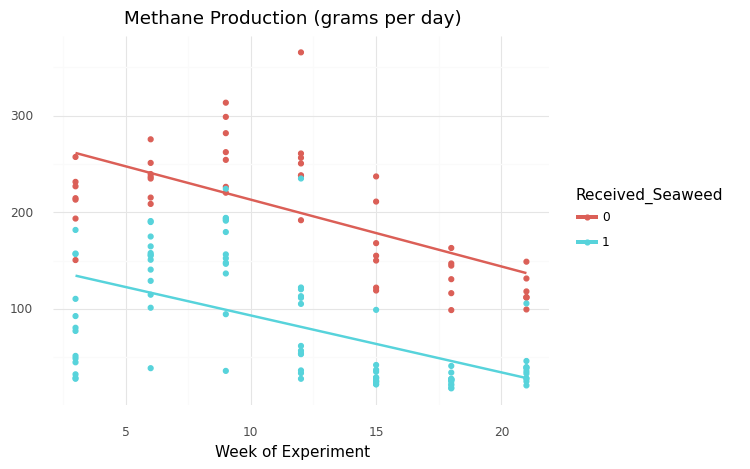

<ggplot: (330071456)>

In [311]:
(ggplot(aes(x = 'Experimental_Week', y = 'CH4_Production', color = 'Received_Seaweed'), GasData) 
 + geom_point()
 + geom_smooth(method = 'lm', se = False)
 + theme_minimal()
 + ggtitle('Figure 1: Methane Production (grams per day)')
 + ylab('')
 + xlab('Week of Experiment'))

The next graph of Figure 2 tells a different story regarding the production of carbon dioxide by the same cows. Similar to the level of methane production, the grams of carbon dioxide produced per day by cattle treated with the red seaweed initially begins at a lower level than the control group. As time progresses, the rate at which carbon dioxide is produced increases in the treatment groups, while rate of the control group decreases. Before the fifteenth week of the experiment. The treatment groups begin producing more grams of carbon dioxide per day than the control group.

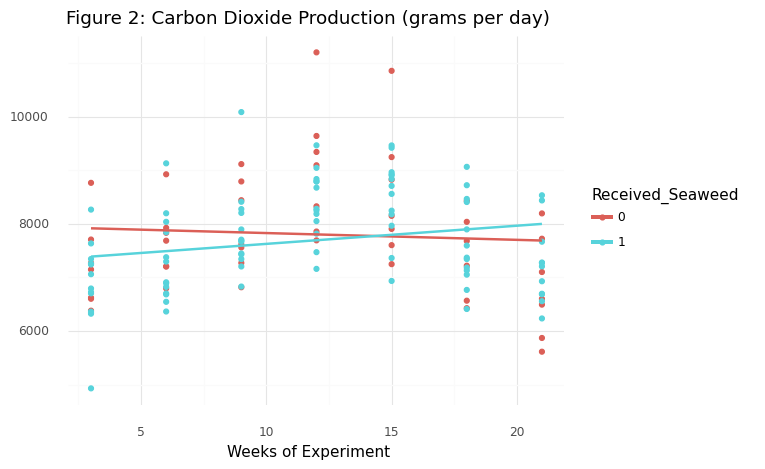

<ggplot: (333854648)>

In [333]:
(ggplot(aes(x = 'Experimental_Week', y = 'CO2_Production', color = 'Received_Seaweed'), GasData) 
 + geom_point()
 + geom_smooth(method = 'lm', se = False)
 + ggtitle('Figure 2: Carbon Dioxide Production (grams per day)')
 + ylab('')
 + xlab('Weeks of Experiment')
 + theme_minimal())

These findings indicate some of the challenges in reducing greenhouse gas emissions through changes in the diet of ruminant livestock. Although the treatment increases carbon dioxide emissions further than the control group, the warming potential methane is much higher than that of carbon dioxide. The long-term effect of this switch is unknown in regard to the total impact on global warming.

Below, the log-linear OLS model shows that the effect of the seaweed treatment on log methane emissions is statistically significant.

In [315]:
# Use only final results of experiment for OLS model

GasDataEnd = GasData[GasData['Experimental_Week']==21]

In [316]:
Treatment = GasDataEnd['Received_Seaweed'].tolist()
Log_Methane_Production = GasDataEnd['ln_CH4_Production'].tolist()
  
# adding the constant term
Treatment = sm.add_constant(Treatment)
  
# performing the regression
# and fitting the model
result = sm.OLS(Log_Methane_Production, Treatment).fit()
  
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     50.08
Date:                Thu, 16 Dec 2021   Prob (F-statistic):           2.62e-06
Time:                        19:25:23   Log-Likelihood:                -5.3485
No. Observations:                  18   AIC:                             14.70
Df Residuals:                      16   BIC:                             16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7722      0.131     36.550      0.0

In [317]:
# Merge datasets

GasData['Diet'] = ProductionData['Diet']
GasData['Dry_Matter_Intake'] = ProductionData['Dry_Matter_Intake']
GasData['Initial_Body_Weight'] = ProductionData['Initial_Body_Weight']
GasData['Final_Body_Weight'] = ProductionData['Final_Body_Weight']
GasData['Total_Gain'] = ProductionData['Total_Gain']
GasData['Average_Daily_Gain'] = ProductionData['Average_Daily_Gain']
GasData['Feed_Conversion_Efficiency'] = ProductionData['Feed_Conversion_Efficiency']
GasData['Cost_per_Gain'] = ProductionData['Cost_per_Gain']

TreatmentData = GasData


In [318]:
# Use control cows only for modeling

ControlData = TreatmentData[TreatmentData['Received_Seaweed']==0]

ControlData = ControlData.dropna()


In [319]:
treat_dummies = pd.get_dummies(ControlData.Treatment)

treat_dummies.columns = [c.lower().replace(" ","_") for c in treat_dummies.columns]

treat_dummies = treat_dummies.drop(['control_'],axis=1) # Baseline

ControlData = pd.concat([ControlData.drop(['Treatment'],axis=1),treat_dummies],axis=1)

In [320]:
ControlData['high_dose'] = ControlData['high_dose_']
ControlData['low_dose'] = ControlData['low_dose_']

ControlData = ControlData.drop(columns = ['high_dose_', 'low_dose_'])

In [321]:
diet_dummies = pd.get_dummies(ControlData.Diet)



diet_dummies.columns = [c.lower().replace(" ","_") for c in diet_dummies.columns]

diet_dummies = diet_dummies.drop(['medium_forage'],axis=1) # Baseline



ControlData = pd.concat([ControlData.drop(['Diet'],axis=1),diet_dummies],axis=1)

In [322]:
MLData = ControlData[['CH4_Production', 'Dry_Matter_Intake', 'Initial_Body_Weight','Final_Body_Weight', 'Total_Gain', 'Average_Daily_Gain','Feed_Conversion_Efficiency', 'high_forage']]


In [323]:
y = MLData['CH4_Production']

X = MLData[['Dry_Matter_Intake', 'Initial_Body_Weight', 'Final_Body_Weight', 'Total_Gain', 'Average_Daily_Gain','Feed_Conversion_Efficiency','high_forage']]


In [324]:
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=.25,random_state=2000)

In [325]:
(
    ggplot(train_X.melt(),aes(x="value")) +
    geom_histogram() +
    facet_wrap("variable",scales="free") +
    theme_minimal() +
    theme(figure_size = (10,3)) 
) 

In [326]:
# Modeling pipeline


train_X, test_X, train_y, test_y = train_test_split(X,y,test_size = .25,random_state=1239)

fold_generator = KFold(n_splits=5, shuffle=True,random_state=111)

pipe = Pipeline(steps=[('pre_process', pp.MinMaxScaler()),
                       ('model',None)])


my_models = [
    
    # Linear Model
    {'model' : [LM()]},
    
    # KNN with tuning parameters
    {'model' : [KNN()],
    'model__n_neighbors':[10,15,20,25,30]},
    
    # Decision Tree Classifier
    {'model' : [DTree()],
    'model__max_depth':[1,2,3,5]},
    
    {'model' : [Bag()]},
    
    # Random Forrest Classifier
    {'model' : [RF()],
    'model__max_depth':[1,2,3],
    'model__n_estimators':[500,1000,1250]}
     
     ]

Next, we can observe the results of the models fit with the training data of the control group. With the outcome variable of interest set to grams of methane produced and identified predictors we are able to analyze which model fit the data the best and the corresponding goodness-of-fit of the model represented by the R-squared value. 

The best performing model in this case was the Bagging Regressor. When I used this model on the test data, the R-squared value was 0.27. This tells us that the model was not very predictive of the outcome variable. This could be due to the small sample size of the data and possible issues of the predictor variables. Figure 3, shown below, visualizes the fitted line of the model against the true value points of the data used.

In [327]:
search = GridSearchCV(pipe, my_models,
                     cv = fold_generator,
                     scoring = 'neg_mean_squared_error',
                     n_jobs = 4)

search.fit(train_X, train_y)



GridSearchCV(cv=KFold(n_splits=5, random_state=111, shuffle=True),
             estimator=Pipeline(steps=[('pre_process', MinMaxScaler()),
                                       ('model', None)]),
             n_jobs=4,
             param_grid=[{'model': [LinearRegression()]},
                         {'model': [KNeighborsClassifier()],
                          'model__n_neighbors': [10, 15, 20, 25, 30]},
                         {'model': [DecisionTreeClassifier()],
                          'model__max_depth': [1, 2, 3, 5]},
                         {'model': [BaggingRegressor()]},
                         {'model': [RandomForestClassifier()],
                          'model__max_depth': [1, 2, 3],
                          'model__n_estimators': [500, 1000, 1250]}],
             scoring='neg_mean_squared_error')

In [331]:
search.best_score_


In [330]:
search.best_params_

In [328]:
pred_y = search.predict(test_X)

m.mean_squared_error(test_y,pred_y)

In [329]:
m.r2_score(test_y,pred_y)

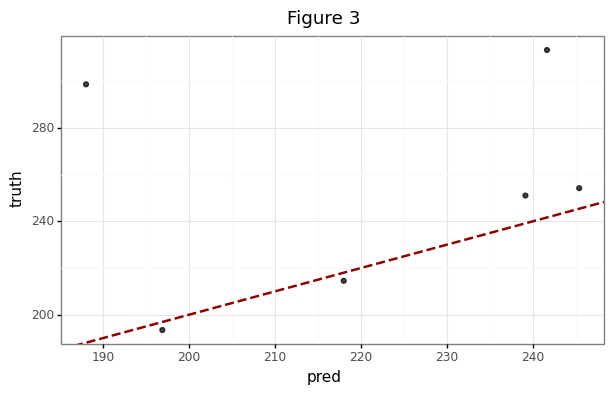

<ggplot: (330063153)>

In [336]:
(ggplot(pd.DataFrame(dict(pred=pred_y,truth=test_y)),
          aes(x='pred',y="truth")) +
    geom_point(alpha=.75) +
    geom_abline(linetype="dashed",color="darkred",size=1) +
 ggtitle('Figure 3')+
    theme_bw() +
    theme(figure_size=(7,4)))

In [220]:
bag_mod = search.best_estimator_


In [221]:
vi = permutation_importance(bag_mod,train_X,train_y,n_repeats=5)


# Organize as a data frame 
vi_dat = pd.DataFrame(dict(variable=train_X.columns,
                           vi = vi['importances_mean'],
                           std = vi['importances_std']))

# Generate intervals
vi_dat['low'] = vi_dat['vi'] - 2*vi_dat['std']
vi_dat['high'] = vi_dat['vi'] + 2*vi_dat['std']

# Put in order from most to least important
vi_dat = vi_dat.sort_values(by="vi",ascending=False).reset_index(drop=True)

The next visualization of Figure 4 shows the permutation importance of the predictor variables in reducing mean-squared error when a single predictor is shuffled. It appears that predictors having to do with size and the amount of forage in the diet of the cattle are the most important. This coincides with the original hypothesis that diet would be important in predicting methane emissions from cattle, but it appears that weight and weight gain also play a significant role.

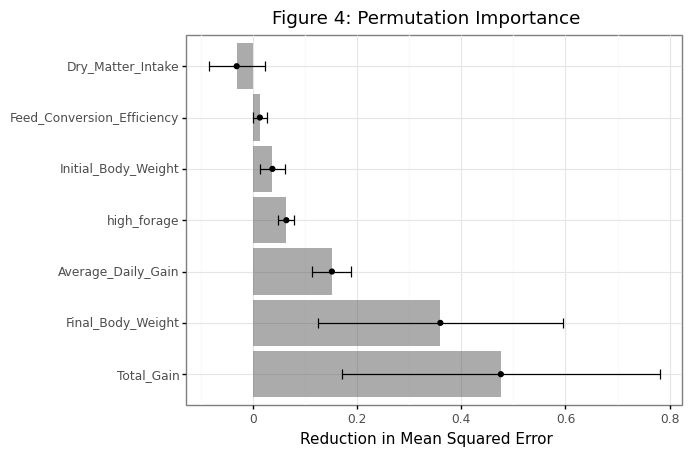

<ggplot: (333674075)>

In [338]:
# Build permutation importance plots

(
    ggplot(vi_dat,
          aes(x="variable",y="vi")) +
    geom_col(alpha=.5) +
    geom_point() +
    geom_errorbar(aes(ymin="low",ymax="high"),width=.2) +
    ggtitle('Figure 4: Permutation Importance')+
    theme_bw() +
    scale_x_discrete(limits=vi_dat.variable.tolist()) +
    coord_flip() +
    labs(y="Reduction in Mean Squared Error",x="")
)

Figure 6 below shows partial dependency plots of the most important variables. This tells us the marginal effects of predictiveness of the predictors of the model. For example, cattle consuming medium amounts of forage in their diets has a higher predictiveness than those consuming high amounts of forage. The size variables each tell their own story as well. The average amount of weight gained per day increases in dependency as average weight gain increases. The other size related predictors, final body weight and total gain of the cattle, both decrease in dependency as the variables increase in value. This goes against prior predictions such as for total gain of the cattle. For cows that increased in weight greater than others should also increase in methane production.

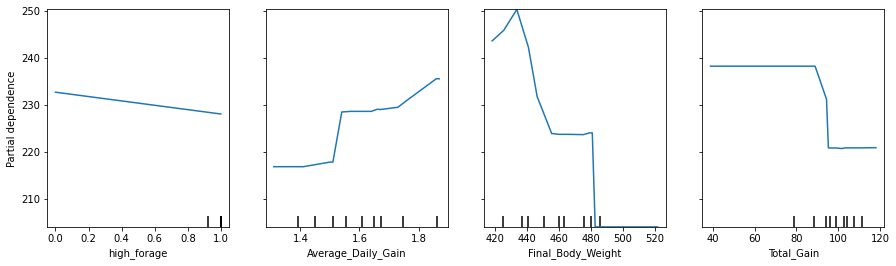

In [225]:
features = ['high_forage','Average_Daily_Gain','Final_Body_Weight', 'Total_Gain']

# Plot Partial dependency plots for top variables
fig, ax = plt.subplots(figsize=(15, 4))
display = plot_partial_dependence(
    bag_mod, train_X, features,n_cols=5,
    n_jobs=4, grid_resolution=30,ax=ax
)

From the results of this model, I’ve learned that size is a very important factor in the production of methane emissions, but I haven’t observed many studies similar to ones discussed previously where this is the main focus. Usually the diet of the cattle is the highest valued determinant of methane emissions.

Some of the things that I’ve learned while gathering these results the impact that having good data has on the accuracy of model prediction. The accuracy of my model would have benefitted greatly from further observations of cattle that had information on individual methane produced by cows or more detailed predictor variables relating to the physical characteristics and diet of the cows. Regarding the results, this model has room for improvement. Possibly interacting certain variables to create more predictors would help increase accuracy. I am wary to accept takeaways such as size being the most important feature in predictiveness. Some potential hypotheses I’ve gained is the effect of final body weight on methane emissions. Potentially, this may be an important factor in addressing methane emissions from cattle and should be studied further.

## Discussion

When I first proposed this project, my goal was to gain insight on whether methane emissions due to agriculture from cattle was sustainable as demand for beef and other cow products increases. My goals for this project have changed since then, but it is an important question to ask and can build on what we have here. I did not achieve my goal of creating an accurate, robust prediction model for methane emissions, shown by the low performance of the predictive model. If I had the time to expand on this analysis further, I would look further into sources of available data for individually measured gas emissions of cows and explore further variables like those pertaining to difference in the digestive processes of the cattle. I would also like to be able to generalize this information and possible findings. Further studying differences in climate and how that affects gas emissions from cows would also be interesting to use as a predictive feature in a future model.

## Works Cited

Harris, C. R., Millman, K. J., van der Walt, S. J., Gommers, R., Virtanen, P., Cournapeau, D., … Oliphant, T. E. (2020). Array programming with NumPy. Nature, 585, 357–362. https://doi.org/10.1038/s41586-020-2649-2

Hunter, J. D. (2007). Matplotlib: A 2D graphics environment. Computing in Science &amp; Engineering, 9(3), 90–95.

McKinney, W., & others. (2010). Data structures for statistical computing in python. In Proceedings of the 9th Python in Science Conference (Vol. 445, pp. 51–56).

Negussie, Enyew & Gonzalez-Recio, Oscar & Haas, Yvette & Gengler, Nicolas & Soyeurt, hélène & Peiren, Nico & Pszczola, Marcin & Garnsworthy, Phil & Battagin, Mara & Bayat, Alireza & Lassen, Jan & Yan, Tianhai & Boland, Tommy & Kuhla, Björn & Strabel, Tomasz & Schwarm, Angela & Vanlierde, Amélie & Biscarini, Filippo. (2019). Machine learning ensemble algorithms in predictive analytics of dairy cattle methane emission using imputed versus non-imputed datasets.

Pedregosa, F., Varoquaux, Ga"el, Gramfort, A., Michel, V., Thirion, B., Grisel, O., … others. (2011). Scikit-learn: Machine learning in Python. Journal of Machine Learning Research, 12(Oct), 2825–2830.

Roque, B. M., Venegas, M., Kinley, R., deNys, R., Neoh, T. L., Duarte, T. L., Yang, X., Salwen, J. K., & Kebreab, E. (2020). Red Seaweed (asparagopsis taxiformis)supplementation reduces enteric methane by over 80 percent in Beef Steers. https://doi.org/10.1101/2020.07.15.204958

Seabold, S., & Perktold, J. (2010). statsmodels: Econometric and statistical modeling with python. In 9th Python in Science Conference.

Wickham, H. (2016). ggplot2: Elegant Graphics for Data Analysis. Springer-Verlag New York. Retrieved from https://ggplot2.tidyverse.org